# Projeto Airbnb Rio - Ferramenta de Previsão de Preço de Imóvel  

### Contexto

No Airbnb, qualquer pessoa que tenha um quarto ou um imóvel de qualquer tipo (apartamento, casa, chalé, pousada, etc.) pode ofertar o seu imóvel para ser alugado por diária.

Você cria o seu perfil de host (pessoa que disponibiliza um imóvel para aluguel por diária) e cria o anúncio do seu imóvel.

Nesse anúncio, o host deve descrever as características do imóvel da forma mais completa possível, de forma a ajudar os locadores/viajantes a escolherem o melhor imóvel para eles (e de forma a tornar o seu anúncio mais atrativo)

Existem dezenas de personalizações possíveis no seu anúncio, desde quantidade mínima de diária, preço, quantidade de quartos, até regras de cancelamento, taxa extra para hóspedes extras, exigência de verificação de identidade do locador, etc.

### Objetivo

Construir um modelo de previsão de preço que permita uma pessoa comum que possui um imóvel possa saber quanto deve cobrar pela diária do seu imóvel.

Ou ainda, para o locador comum, dado o imóvel que ele está buscando, ajudar a saber se aquele imóvel está com preço atrativo (abaixo da média para imóveis com as mesmas características) ou não.

### O que temos disponível, inspirações e créditos

As bases de dados foram retiradas do site kaggle: <https://www.kaggle.com/allanbruno/airbnb-rio-de-janeiro>

- As bases de dados são os preços dos imóveis obtidos e suas respectivas características em cada mês.
- Os preços são dados em reais (R$)
- Temos bases de abril de 2018 a maio de 2020, com exceção de junho de 2018 que não possui base de dados

Expectativas Iniciais

- Acredito que a sazonalidade pode ser um fator importante, visto que meses como dezembro costumam ser bem caros no RJ
- A localização do imóvel deve fazer muita diferença no preço, já que no Rio de Janeiro a localização pode mudar completamente as características do lugar (segurança, beleza natural, pontos turísticos)
- Adicionais/Comodidades podem ter um impacto significativo, visto que temos muitos prédios e casas antigos no Rio de Janeiro

Vamos descobrir o quanto esses fatores impactam e se temos outros fatores não tão intuitivos que são extremamente importantes.

### Storytelling
 - Entendimento do Desafio
 - Entendimento da Empresa/Negocio
 - Extração/Obtenção de Dados
 - Ajustes de Dados (Limpeza de Dados)
 - Análise Exploratória
 - Modelagem + Algoritmos
 - Interpretação dos Resultados
 - Deploy/Produção

### Importar Bibliotecas e Bases de Dados

In [66]:
import pandas as pd
import pathlib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px #Module for dynamic data visualization

# Métricas de Test
from sklearn.metrics import r2_score, mean_squared_error

# Modelos de Regressão
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.model_selection import train_test_split

### Consolidar Base de Dados

In [2]:
# criando um dicionário para adicionar as colunas com meses e anos das bases de dados
meses = {'jan':1, 'fev':2, 'mar':3, 'abr':4, 'mai':5, 'jun':6, 'jul':7, 'ago':8, 'set':9, 'out':10, 'nov':11, 'dez':12}

caminho_bases = pathlib.Path('dataset')

base_airbnb = pd.DataFrame()

# .iterdir() vai interagir com a lista de arquivos dentro da psta do caminho
for arquivo in caminho_bases.iterdir():
    mes = meses[arquivo.name[:3]]
    
    ano = arquivo.name[-8:-4]
    
    df = pd.read_csv(caminho_bases / arquivo.name)
    df['ano'] = ano
    df['mes'] = mes
    base_airbnb = base_airbnb.append(df)

display(base_airbnb)

C:\Users\Usuário\AppData\Local\Temp\ipykernel_17828\2810988187.py:14: DtypeWarning: Columns (62,87) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(caminho_bases / arquivo.name)
C:\Users\Usuário\AppData\Local\Temp\ipykernel_17828\2810988187.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  base_airbnb = base_airbnb.append(df)
C:\Users\Usuário\AppData\Local\Temp\ipykernel_17828\2810988187.py:14: DtypeWarning: Columns (61,62,94) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(caminho_bases / arquivo.name)
C:\Users\Usuário\AppData\Local\Temp\ipykernel_17828\2810988187.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  base_airbnb = base_airbnb.append(df)
C:\Users\Usuário\AppData\Local\Temp\ipykernel_17828\2810988187.py:1

C:\Users\Usuário\AppData\Local\Temp\ipykernel_17828\2810988187.py:14: DtypeWarning: Columns (61,62,94) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(caminho_bases / arquivo.name)
C:\Users\Usuário\AppData\Local\Temp\ipykernel_17828\2810988187.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  base_airbnb = base_airbnb.append(df)
C:\Users\Usuário\AppData\Local\Temp\ipykernel_17828\2810988187.py:14: DtypeWarning: Columns (61,62,94) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(caminho_bases / arquivo.name)
C:\Users\Usuário\AppData\Local\Temp\ipykernel_17828\2810988187.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  base_airbnb = base_airbnb.append(df)
C:\Users\Usuário\AppData\Local\Temp\ipykernel_17828\2810988187.p

id                            listing_url       scrape_id  \
0         14063     https://www.airbnb.com/rooms/14063  20180414160018   
1         17878     https://www.airbnb.com/rooms/17878  20180414160018   
2         24480     https://www.airbnb.com/rooms/24480  20180414160018   
3         25026     https://www.airbnb.com/rooms/25026  20180414160018   
4         31560     https://www.airbnb.com/rooms/31560  20180414160018   
...         ...                                    ...             ...   
34324  38844730  https://www.airbnb.com/rooms/38844730  20190923212307   
34325  38846408  https://www.airbnb.com/rooms/38846408  20190923212307   
34326  38846703  https://www.airbnb.com/rooms/38846703  20190923212307   
34327  38847050  https://www.airbnb.com/rooms/38847050  20190923212307   
34328  38847655  https://www.airbnb.com/rooms/38847655  20190923212307   

      last_scraped                                          name  \
0       2018-04-14                          Living in a Postcard   
1       2018-04-14             Very Nice 2Br - Copacabana - WiFi   
2       2018-04-14              Nice and cozy near Ipanema Beach   
3       2018-04-14     Beautiful Modern Decorated Studio in Copa   
4       2018-04-14              NICE & COZY 1BDR - IPANEMA BEACH   
...            ...                                           ...   
34324   2019-09-24             TRANSAMERICA BARRA DA TIJUCA R IV   
34325   2019-09-24                      Alugo para o Rock in Rio   
34326   2019-09-24  Apt COMPLETO em COPACABANA c/TOTAL SEGURANÇA   
34327   2019-09-24                     Cobertura Cinematografica   
34328   2019-09-24     Quarto em cobertura em frente à praia III   

                                                 summary  \
0      Besides the most iconic's view, our apartment ...   
1      Please note that special rates apply for New Y...   
2      My studio is located in the best  of Ipanema. ...   
3      Our apartment is a little gem, everyone loves ...   
4      This nice and clean 1 bedroom apartment is loc...   
...                                                  ...   
34324  Em estilo contemporâneo, o Transamerica Prime ...   
34325  Confortável apartamento, 2 quartos , sendo 1 s...   
34326  Apartamento quarto e sala COMPLETO para curtas...   
34327                               Cobertura alto nivel   
34328  Quarto em cobertura quadriplex com vista lindí...   

                                                   space  \
0                                                    NaN   
1      - large balcony which looks out on pedestrian ...   
2      The studio is located at Vinicius de Moraes St...   
3      This newly renovated studio (last renovations ...   
4      This nice and clean 1 bedroom apartment is loc...   
...                                                  ...   
34324                                                NaN   
34325  O apartamento estará com mobília completa disp...   
34326  Espaço ideal para até 5 pessoas. Cama de casal...   
34327                                                NaN   
34328                                                NaN   

                                             description experiences_offered  \
0      Besides the most iconic's view, our apartment ...                none   
1      Please note that special rates apply for New Y...                none   
2      My studio is located in the best  of Ipanema. ...                none   
3      Our apartment is a little gem, everyone loves ...                none   
4      This nice and clean 1 bedroom apartment is loc...                none   
...                                                  ...                 ...   
34324  Em estilo contemporâneo, o Transamerica Prime ...                none   
34325  Confortável apartamento, 2 quartos , sendo 1 s...                none   
34326  Apartamento quarto e sala COMPLETO para curtas...                none   
34327                               Cobertura alto nivel         

In [3]:
print(list(base_airbnb.columns))
base_airbnb.head(1000).to_csv('primeiros_mil_registros.csv')

['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude', 'is_location_exact', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet', 'price', 'weekly_price', 'monthly_price', '

### Havendo muitas colunas, identificar quais colunas podemos excluidas
 - evitando que o modelo leve muito tempo para processar os comandos
 - remover todas as colunas realmente desnecessárias, para que o modelo de machine learning não considere dados irrelevantes
 - tipos de arquivos a serem exclidos:
     1. IDs, links e info não relevantes p/ o modelo
     2. colunas repedidas ou com info ambiguas
     3. colunas preenchidas com texto livre, o modelo não fará análise de palavars ou algo parecido
     4. colunas em que todos ou quase todos os valores são iguais
     5. em termos de localização, geralmente latitude e longitude entregam o melhor resultado
     6. se pelo menos metade dos dados de uma coluna estiverem vazios, geralmente é melhor excluir a coluna, caso a coluna seja relevante, preencher com alguma métrica.
 
Para isso, criar um arquivo excel com os 1000 primeiros registros, fazer uma analise qualitativa de cada coluna para a análise do modelo e observar cada coluna e exclui-las no excel, na mão mesmo.

In [4]:
# filtrando a quantidade diferente de dados em uma coluna, para ajudar a mensurar a relevancia da mesma.
print(base_airbnb[['host_acceptance_rate']].value_counts())

host_acceptance_rate
100%                    31697
0%                       4744
50%                      3781
99%                      3320
67%                      3140
                        ...  
16%                        22
15%                        21
7%                         20
51%                        18
6%                         11
Length: 100, dtype: int64


In [5]:
# filtrando e comparando se duas colunas possuem os mesmos valores.
print((base_airbnb['host_listings_count'] == base_airbnb['host_total_listings_count']).value_counts())

True     901750
False       460
dtype: int64


In [6]:
# filtrando quantos valores estão vazios.
print(base_airbnb['square_feet'].isnull().sum())

888162


### Depois da análise qualitativadas colunas levando em conta os critérios explicados acima, ficamos com as seguinte colunas:
 - criar uma coluna vazia no inicio da planilha
 - para adicionar aspas simples 'xxx' nos nomes das colunas:
    - no excel, inserir uma linha abaixo do menu das colunas e digitar na célula abaixo da primeira coluna:
    - ="'"&B1&"'"
 - digitar na primeira coluna, antes da celula com o primeiro nome do menu:
    - =UNIRTEXTO(",";FALSO; B2:AI2)
 - depois de pegar a lista com as colunas relevantes, vamos filtrar toda a base de dados somente com as colunas desejadas

In [7]:
colunas = ['host_response_time', 'host_response_rate', 'host_is_superhost', 'host_listings_count', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable', 'is_business_travel_ready', 'cancellation_policy', 'ano', 'mes']

base_airbnb = base_airbnb.loc[:, colunas]
display(base_airbnb)

host_response_time host_response_rate host_is_superhost  \
0                     NaN                NaN                 f   
1          within an hour               100%                 t   
2          within an hour               100%                 f   
3          within an hour               100%                 f   
4          within an hour               100%                 t   
...                   ...                ...               ...   
34324      within an hour                93%                 f   
34325                 NaN                NaN                 f   
34326  within a few hours                74%                 f   
34327                 NaN                NaN                 f   
34328  a few days or more                38%                 f   

       host_listings_count   latitude  longitude property_type  \
0                      1.0 -22.946854 -43.182737     Apartment   
1                      2.0 -22.965919 -43.178962   Condominium   
2                      1.0 -22.985698 -43.201935     Apartment   
3                      3.0 -22.977117 -43.190454     Apartment   
4                      1.0 -22.983024 -43.214270     Apartment   
...                    ...        ...        ...           ...   
34324                  0.0 -23.003180 -43.342840     Apartment   
34325                  0.0 -22.966640 -43.393450     Apartment   
34326                 32.0 -22.962080 -43.175520     Apartment   
34327                  0.0 -23.003400 -43.341820     Apartment   
34328                  5.0 -23.010560 -43.363350     Apartment   

             room_type  accommodates  bathrooms  ...  \
0      Entire home/apt             4        1.0  ...   
1      Entire home/apt             5        1.0  ...   
2      Entire home/apt             2        1.0  ...   
3      Entire home/apt             3        1.0  ...   
4      Entire home/apt             3        1.0  ...   
...                ...           ...        ...  ...   
34324  Entire home/apt             4        1.0  ...   
34325  Entire home/apt             4        2.0  ...   
34326  Entire home/apt             5        1.0  ...   
34327  Entire home/apt             4        1.0  ...   
34328     Private room             2        0.0  ...   

       review_scores_cleanliness  review_scores_checkin  \
0                            9.0                    9.0   
1                            9.0                   10.0   
2                           10.0                   10.0   
3                           10.0                   10.0   
4                           10.0                   10.0   
...                          ...                    ...   
34324                        NaN                    NaN   
34325                        NaN                    NaN   
34326                        NaN                    NaN   
34327                        NaN                    NaN   
34328                        NaN                    NaN   

      review_scores_communication review_scores_location review_scores_value  \
0                             9.0                    9.0                 9.0   
1                            10.0                    9.0                 9.0   
2                            10.0                   10.0                 9.0   
3                            10.0                   10.0                 9.0   
4                            10.0                   10.0                 9.0   
...                           ...                    ...                 ...   
34324                         NaN                    NaN                 NaN   
34325                         NaN                    NaN                 NaN   
34326                         NaN                    NaN                 NaN   
34327                         NaN                    NaN                 NaN   
34328                         NaN                    NaN                 NaN   

      instant_bookable is_business_travel_ready          cancellation_policy  

### Tratar Valores Faltando - NaN
Geralmente os modelos de machine learning apresentam problemas quando este valores aparecem na base de dados.
 -  identificar em quais colunas aparecem valores como NaN

Podemos tratar este problema basicamente de 3 maneiras:
 - deletar as linhas onde NaN, quando o volume de linhas representar um % pequeno da base de dados, deletar as linhas 
 é uma opção.
 - deletar as colunas que não apresentam muita relevancia com um volume considerável de valores nulos.
 - preencher estes valores de alguma maneira. Em alguns casos o valor nulo representa o valor 0, mas tomar cuidado para não criar um vies a partir destes valores nulos, o recomendado é que somente se adote esta abordagem caso se tenha certeza desta informação.
 
Deve-se avaliar cuidadosamente cada caso para tomar a melhor decisão em cada coluna.

In [8]:
print(base_airbnb.isnull().sum())

host_response_time             401843
host_response_rate             401846
host_is_superhost                 460
host_listings_count               460
latitude                            0
longitude                           0
property_type                       0
room_type                           0
accommodates                        0
bathrooms                        1724
bedrooms                          850
beds                             2502
bed_type                            0
amenities                           0
price                               0
security_deposit               421280
cleaning_fee                   313506
guests_included                     0
extra_people                        0
minimum_nights                      0
maximum_nights                      0
number_of_reviews                   0
review_scores_rating           448016
review_scores_accuracy         448586
review_scores_cleanliness      448413
review_scores_checkin          448650
review_score

### Excluir as colunas com mais de 300k de linhas NaN

In [9]:
# excluindo as colunas
for coluna in base_airbnb:
    if base_airbnb[coluna].isnull().sum() > 300000:
        base_airbnb = base_airbnb.drop(coluna, axis=1)
        
# excluindo as linhas
base_airbnb = base_airbnb.dropna()

print(base_airbnb.isnull().sum())

# .shape mostra quantas linhas e colunas possui o DataFrame
print(base_airbnb.shape) 

host_is_superhost           0
host_listings_count         0
latitude                    0
longitude                   0
property_type               0
room_type                   0
accommodates                0
bathrooms                   0
bedrooms                    0
beds                        0
bed_type                    0
amenities                   0
price                       0
guests_included             0
extra_people                0
minimum_nights              0
maximum_nights              0
number_of_reviews           0
instant_bookable            0
is_business_travel_ready    0
cancellation_policy         0
ano                         0
mes                         0
dtype: int64
(897709, 23)


### Verificar Tipos de Dados em cada coluna
Para isso printamos o type de cada coluna e a primeira linha para não precisar printar todo o DataFrame.

In [10]:
print(base_airbnb.dtypes)
print('-'*80)
print(base_airbnb.iloc[0])

host_is_superhost            object
host_listings_count         float64
latitude                    float64
longitude                   float64
property_type                object
room_type                    object
accommodates                  int64
bathrooms                   float64
bedrooms                    float64
beds                        float64
bed_type                     object
amenities                    object
price                        object
guests_included               int64
extra_people                 object
minimum_nights                int64
maximum_nights                int64
number_of_reviews             int64
instant_bookable             object
is_business_travel_ready     object
cancellation_policy          object
ano                          object
mes                           int64
dtype: object
--------------------------------------------------------------------------------
host_is_superhost                                                           f

### Modificar tipo de variável da colunas com o Numpy as np
 - price > float
 - extra_people > float
 - ano > int

In [11]:
# price
base_airbnb['price'] = base_airbnb['price'].str.replace('$', '')
base_airbnb['price'] = base_airbnb['price'].str.replace(',', '')
base_airbnb['price'] = base_airbnb['price'].astype(np.float32, copy=False)

# extra_people
base_airbnb['extra_people'] = base_airbnb['extra_people'].str.replace('$', '')
base_airbnb['extra_people'] = base_airbnb['extra_people'].str.replace(',', '')
base_airbnb['extra_people'] = base_airbnb['extra_people'].astype(np.float32, copy=False)

# ano
base_airbnb['ano'] = base_airbnb['ano'].astype(np.int32, copy=False)

C:\Users\Usuário\AppData\Local\Temp\ipykernel_17828\2463822751.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  base_airbnb['price'] = base_airbnb['price'].str.replace('$', '')
C:\Users\Usuário\AppData\Local\Temp\ipykernel_17828\2463822751.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  base_airbnb['extra_people'] = base_airbnb['extra_people'].str.replace('$', '')


In [12]:
print(base_airbnb.dtypes)

host_is_superhost            object
host_listings_count         float64
latitude                    float64
longitude                   float64
property_type                object
room_type                    object
accommodates                  int64
bathrooms                   float64
bedrooms                    float64
beds                        float64
bed_type                     object
amenities                    object
price                       float32
guests_included               int64
extra_people                float32
minimum_nights                int64
maximum_nights                int64
number_of_reviews             int64
instant_bookable             object
is_business_travel_ready     object
cancellation_policy          object
ano                           int32
mes                           int64
dtype: object


## Análise Exploratória e Tratar Outliers
Usaremos o conseito de Quartil, dividindo os valores em 4 e analisando os Q1, Q2, Q3 e Q3, os quartos.
- Q1 = ao valor que representa 25% da escala crescente
- Q2 = ao valor que representa 50% da escala crescente
- Q3 = ao valor que representa 75% da escala crescente
- Amplitode = Q1 - Q3

- Vamos olhar feature por feature para:
     1. ver a correlação entre as features e decidir se manteremos todas as features que temos
     2. excluir outliers (usaremos como regra, valores abaixo de Q1 - 1.5xAmplitude e valores acima de Q3 + 1.5xAmplitude).Amplitude = Q3 - Q1
     3. confirmar se todas as features que temos fazem realmente sentido para o nosso modelo, ou se alguma delas não vai nos ajudar e se devemos excluir
- Vamos começar pelas colunasde preço (resultado final que queremos) e de extra_people (também valor monetário) Esses são os valores numéricos contínuos.
- Depois vamos analisar as colunas de valores numéricos discretos (acomodações, bedrooms, guests_included, etc)
- Por fim, vamos avaliar as colunas de texto e definir quais categorias fazem sentido mantermo ou não.

In [13]:
# avaliando as correlações, quando houverem correlações muito fortes que indiquem ambiguidade,
# esta relação pode impactar negativamente o modelo, e talves seja melhor optar apenas por uma feature(coluna, caracteristica)
plt.figure(figsize=(15,10))
sns.heatmap(base_airbnb.corr(), annot=True, cmap='Greens')

<AxesSubplot:>

## Definição de funções para analise de outliers

In [14]:
def limites(coluna):
    q1 = coluna.quantile(0.25)
    q3 = coluna.quantile(0.75)
    amplitude = q3 - q1
    return q1 - 1.5 * amplitude, q3 + 1.5 * amplitude

def excluir_ouliers(df, nome_coluna):
    qtde_linhas = df.shape[0]
    lim_inf , lim_sup = limites(df[nome_coluna])
    df = df.loc[(df[nome_coluna] >= lim_inf) & (df[nome_coluna] <= lim_sup), :]
    linhas_removidas = qtde_linhas - df.shape[0]
    return df, linhas_removidas

In [15]:
# verificando se o retorno está correto

print(limites(base_airbnb['price']))
base_airbnb['price'].describe()

(-524.0, 1276.0)


count    897709.000000
mean        648.062195
std        1705.104980
min           0.000000
25%         151.000000
50%         297.000000
75%         601.000000
max      138288.000000
Name: price, dtype: float64

In [16]:
# função para criar os gráficos de diagrama de caixa
def diagrama_caixa(coluna):
    fig, (ax1, ax2) = plt.subplots(1 ,2)
    fig.set_size_inches(15, 5)
    sns.boxplot(x=coluna, ax=ax1)
    ax2.set_xlim(limites(coluna))
    sns.boxplot(x=coluna, ax=ax2)
    
# função gráfico de histograma
def histograma(coluna):
    plt.figure(figsize=(15, 5))
    sns.distplot(coluna, hist=True)
    
# função gráfico de barras, para melhor visualização dos dados discretos
def grafico_barra(coluna):
    plt.figure(figsize=(15, 5))
    ax = sns.barplot(x=coluna.value_counts().index , y=coluna.value_counts())
    ax.set_xlim(limites(coluna))

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


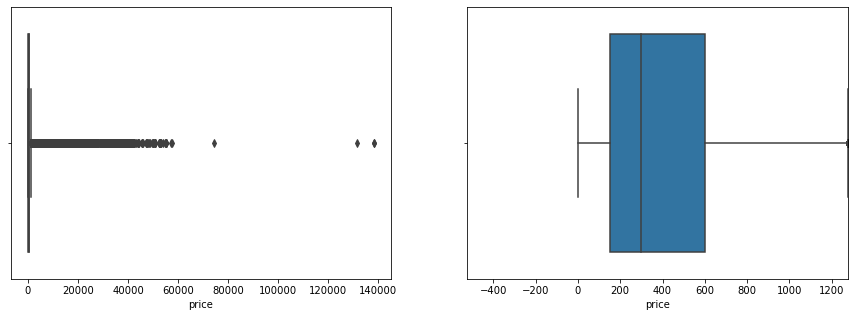

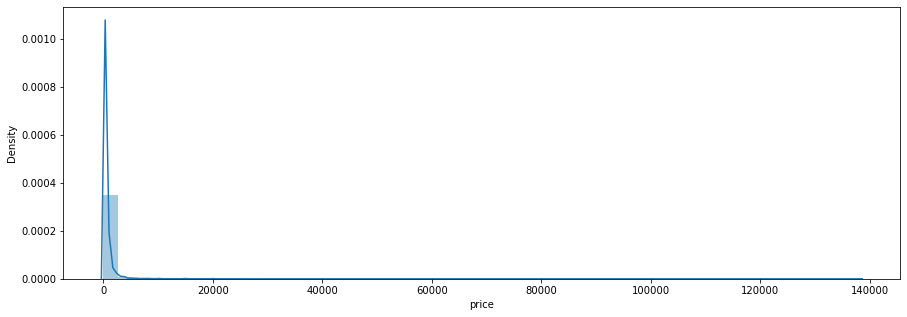

In [17]:
diagrama_caixa(base_airbnb['price'])
histograma(base_airbnb['price'])

#### Como estamos construindo um modelo para imóveis de médio valor, vamos excluir os outlier de alto valor.
Fazendo um unpacking do retorno da função excluir_ouliers() que retorna os 2 valores

In [18]:
base_airbnb, linhas_removidas = excluir_ouliers(base_airbnb, 'price')
print(f'{linhas_removidas} linhas removidas da coluna price.')

87282 linhas removidas da coluna price.


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


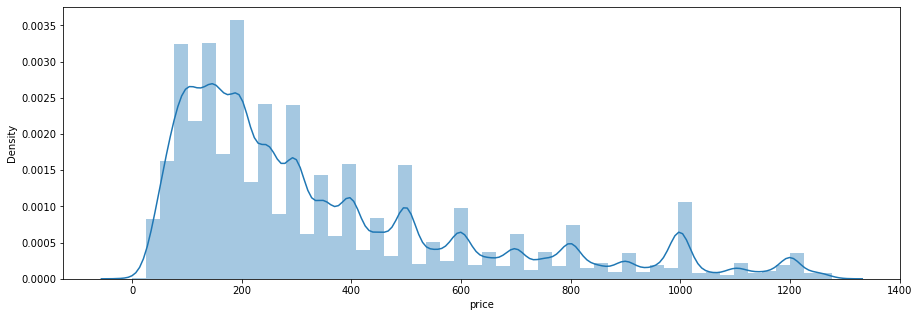

In [19]:
histograma(base_airbnb['price'])

### extra_people 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


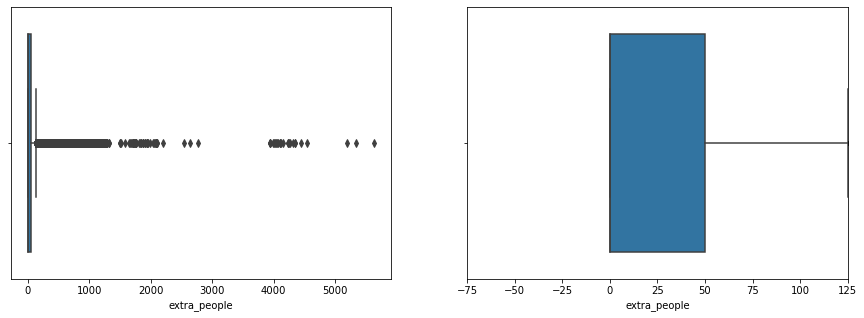

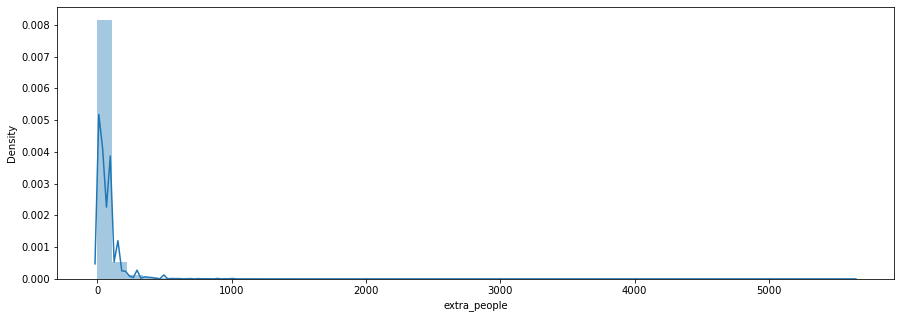

In [20]:
diagrama_caixa(base_airbnb['extra_people'])
histograma(base_airbnb['extra_people'])

In [21]:
base_airbnb, linhas_removidas = excluir_ouliers(base_airbnb, 'extra_people')
print(f'{linhas_removidas} linhas removidas da coluna price.')

59194 linhas removidas da coluna price.


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


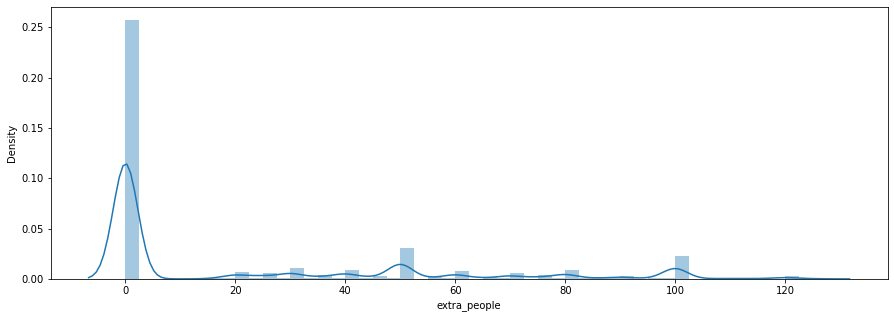

In [22]:
histograma(base_airbnb['extra_people'])

### host_listings_count

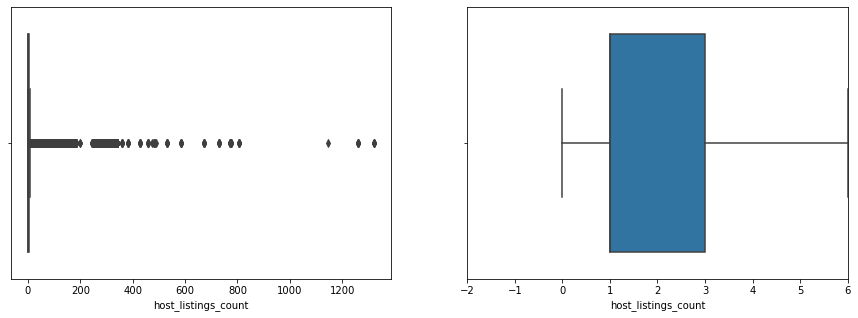

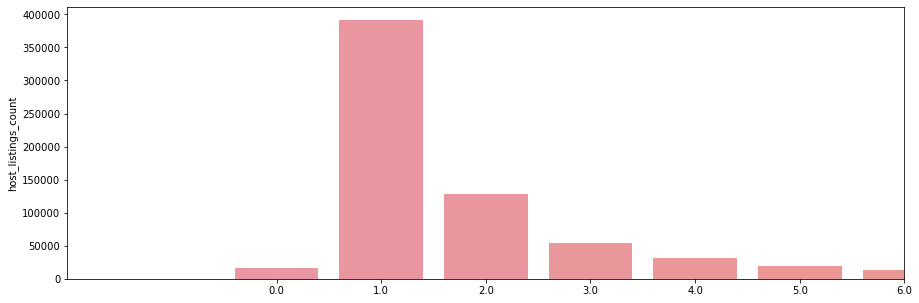

In [23]:
diagrama_caixa(base_airbnb['host_listings_count'])
grafico_barra(base_airbnb['host_listings_count'])

Podemos excluir os outliers, pois para o objetivo do projeto, os hosties com mais de 6 imóveis não impactarão o desempenho do modelo, pois os resultados do modelo irão se aplicar a hosties pequenos.

In [24]:
base_airbnb, linhas_removidas = excluir_ouliers(base_airbnb, 'host_listings_count')
print(f'{linhas_removidas} linhas removidas da coluna price.')

97723 linhas removidas da coluna price.


### accommodates

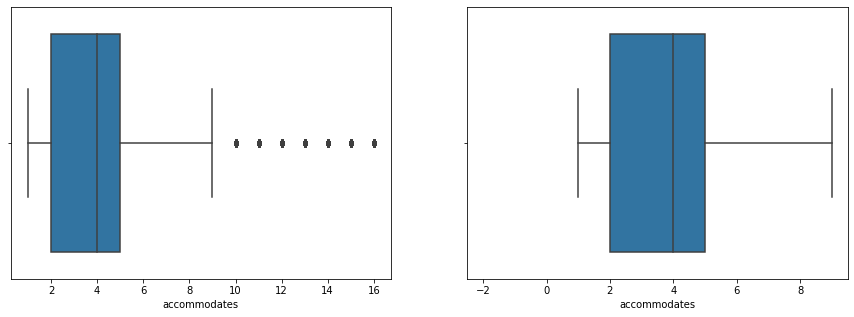

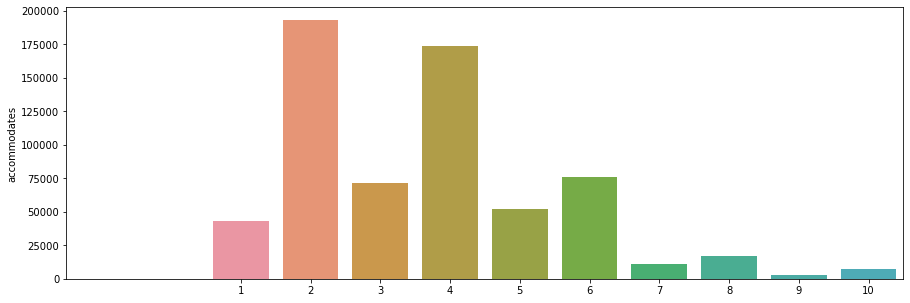

In [25]:
diagrama_caixa(base_airbnb['accommodates'])
grafico_barra(base_airbnb['accommodates'])

In [26]:
base_airbnb, linhas_removidas = excluir_ouliers(base_airbnb, 'accommodates')
print(f'{linhas_removidas} linhas removidas da coluna price.')

13146 linhas removidas da coluna price.


### bathrooms

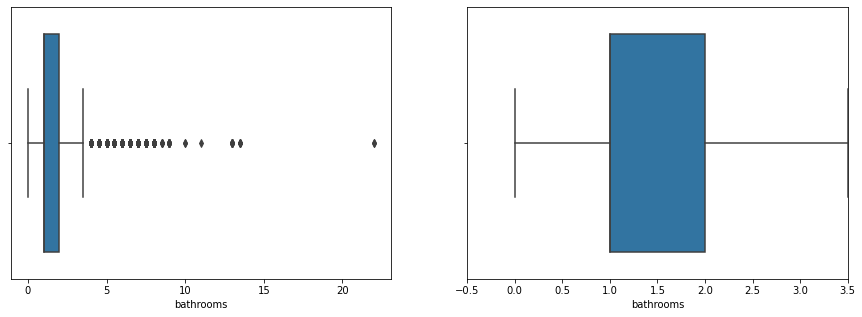

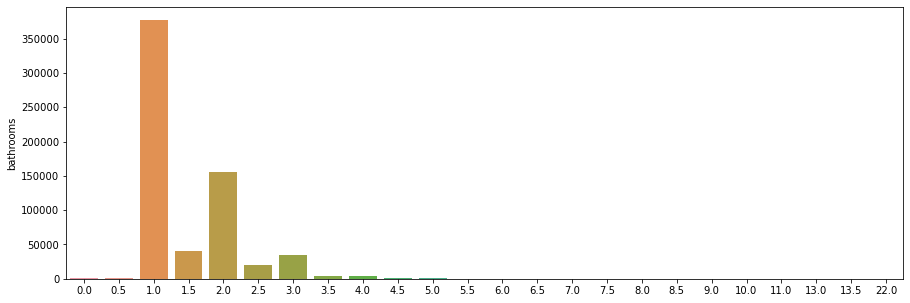

In [27]:
diagrama_caixa(base_airbnb['bathrooms'])

plt.figure(figsize=(15, 5))
ax = sns.barplot(x=base_airbnb['bathrooms'].value_counts().index , y=base_airbnb['bathrooms'].value_counts())

In [28]:
base_airbnb, linhas_removidas = excluir_ouliers(base_airbnb, 'bathrooms')
print(f'{linhas_removidas} linhas removidas da coluna price.')

6894 linhas removidas da coluna price.


### bedrooms

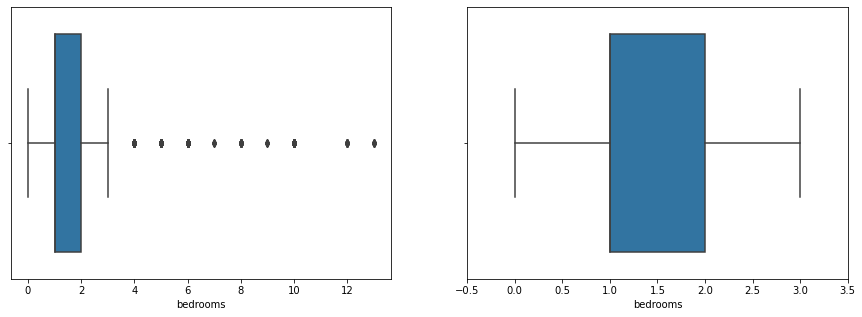

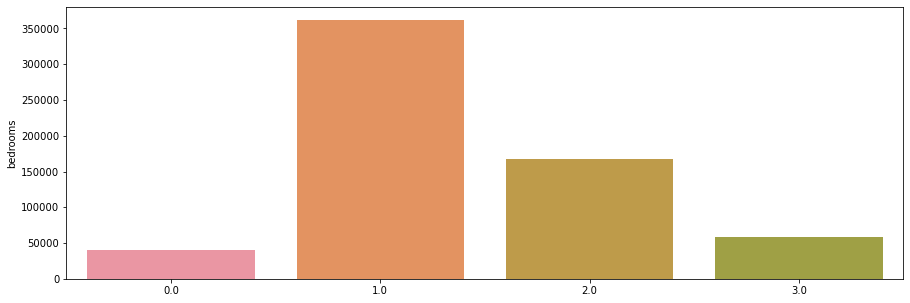

In [29]:
diagrama_caixa(base_airbnb['bedrooms'])
grafico_barra(base_airbnb['bedrooms'])

In [30]:
base_airbnb, linhas_removidas = excluir_ouliers(base_airbnb, 'bedrooms')
print(f'{linhas_removidas} linhas removidas da coluna price.')

5482 linhas removidas da coluna price.


### beds

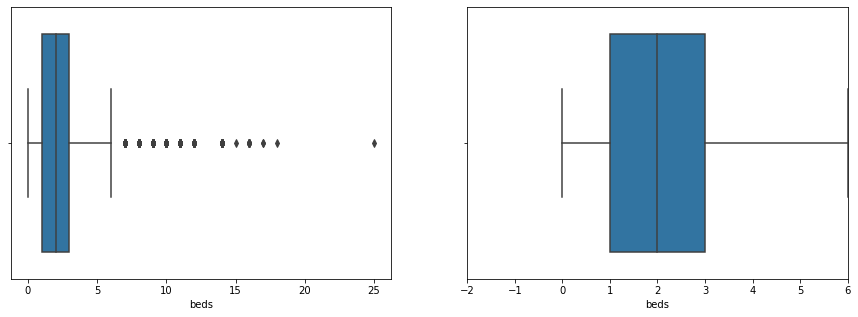

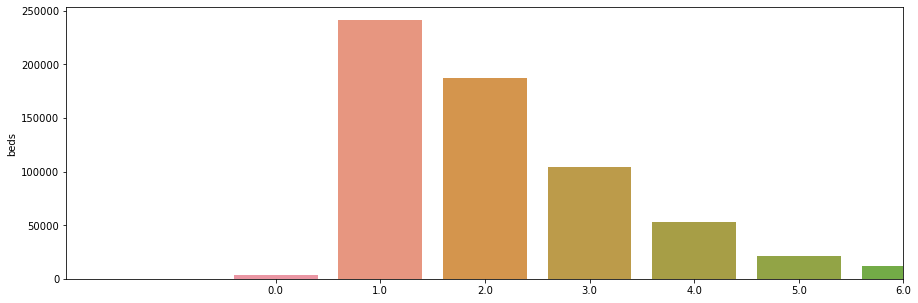

In [31]:
diagrama_caixa(base_airbnb['beds'])
grafico_barra(base_airbnb['beds'])

In [32]:
base_airbnb, linhas_removidas = excluir_ouliers(base_airbnb, 'beds')
print(f'{linhas_removidas} linhas removidas da coluna price.')

5622 linhas removidas da coluna price.


### guests_included
guests_included significa o numero de ocupandes em cada locação, como o valor é de 1 para a grande maioria, faz sentido crer que há um erro na base de dados, preenchimento ou outra razão, sendo assim faz mais sentido remover esta coluna da análise.

C:\Users\Usuário\AppData\Local\Temp\ipykernel_17828\1967643087.py:6: UserWarning: Attempting to set identical left == right == 1.0 results in singular transformations; automatically expanding.
  ax2.set_xlim(limites(coluna))


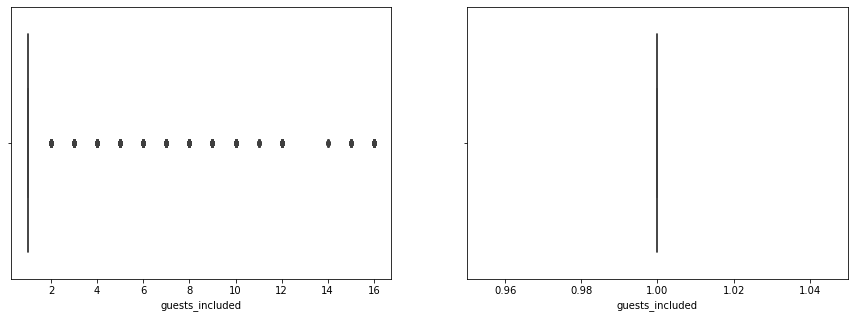

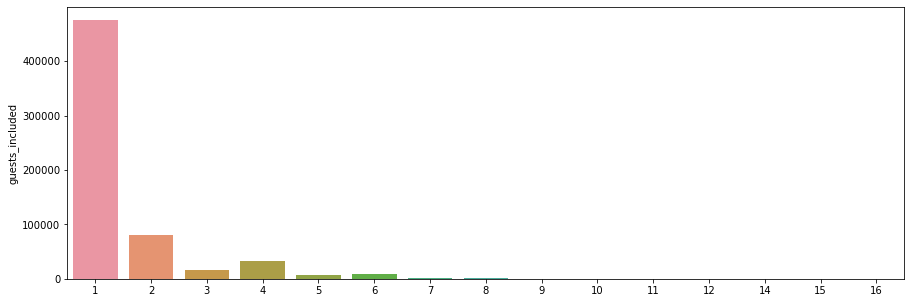

In [33]:
diagrama_caixa(base_airbnb['guests_included'])

plt.figure(figsize=(15, 5))
ax = sns.barplot(x=base_airbnb['guests_included'].value_counts().index , y=base_airbnb['guests_included'].value_counts())

In [34]:
base_airbnb = base_airbnb.drop('guests_included', axis=1)
base_airbnb.shape

(622366, 22)

### minimum_nights

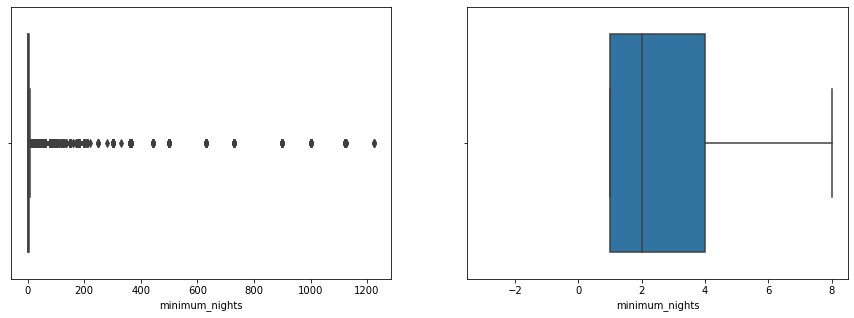

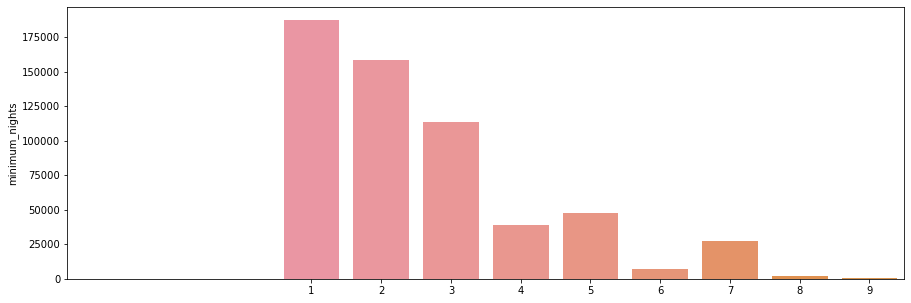

In [35]:
diagrama_caixa(base_airbnb['minimum_nights'])
grafico_barra(base_airbnb['minimum_nights'])

In [36]:
base_airbnb, linhas_removidas = excluir_ouliers(base_airbnb, 'minimum_nights')
print(f'{linhas_removidas} linhas removidas da coluna price.')

40383 linhas removidas da coluna price.


### maximum_nights
Significa o numero de noites máximo em cada locação, faz sentido crer que há um erro na base de dados, preenchimento ou outra razão, sendo assim faz mais sentido remover esta coluna da análise.

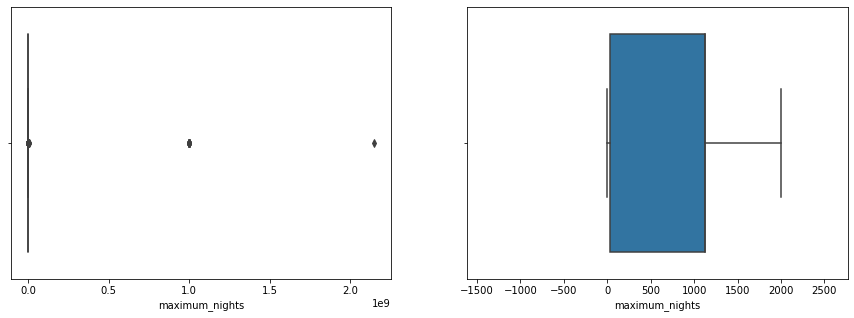

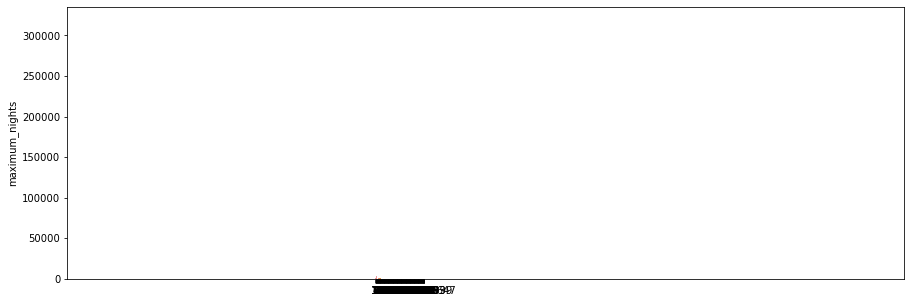

In [37]:
diagrama_caixa(base_airbnb['maximum_nights'])
grafico_barra(base_airbnb['maximum_nights'])

In [38]:
base_airbnb = base_airbnb.drop('maximum_nights', axis=1)
base_airbnb.shape

(581983, 21)

### number_of_reviews
Como o número de reviews impacta os hosties mais antigos e o modelo será voltado para novos hosties, o number_of_reviews poderá impactar negativamente o modelo para estes novos hosties.

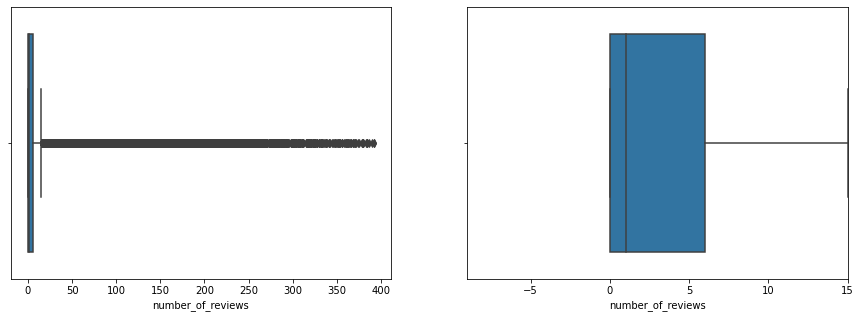

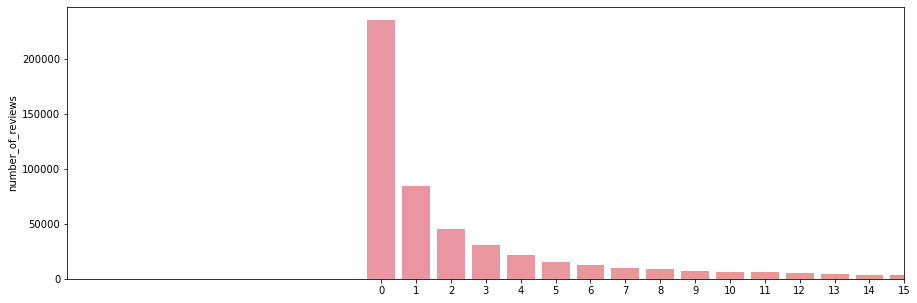

In [39]:
diagrama_caixa(base_airbnb['number_of_reviews'])
grafico_barra(base_airbnb['number_of_reviews'])

In [40]:
base_airbnb = base_airbnb.drop('number_of_reviews', axis=1)
base_airbnb.shape

(581983, 20)

## Tratamento das colunas de Vaslores de Texto

### property_type
Vamos categorizar os tipos de imóvel até 'Guesthouse', daí em diante vamos agrupar em uma única categoria, pois o modelo não terá dados suficientes para avaliar as outras categorias que são pouco numerosas.

Apartment                 458354
House                      51387
Condominium                26456
Serviced apartment         12671
Loft                       12352
Guest suite                 3621
Bed and breakfast           3472
Hostel                      2665
Guesthouse                  2155
Other                       1957
Villa                       1294
Townhouse                    969
Aparthotel                   693
Chalet                       481
Earth house                  468
Tiny house                   457
Boutique hotel               447
Hotel                        376
Casa particular (Cuba)       298
Cottage                      230
Bungalow                     207
Dorm                         185
Cabin                        141
Nature lodge                 124
Castle                        80
Treehouse                     76
Island                        54
Boat                          53
Hut                           40
Campsite                      34
Resort    

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


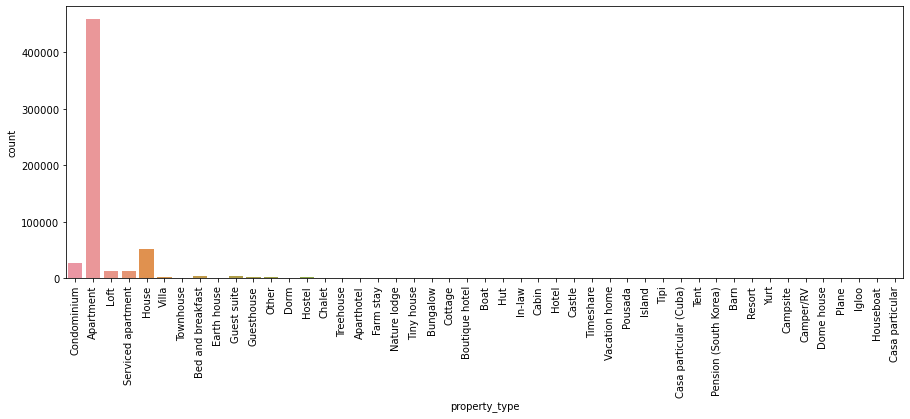

In [41]:
print(base_airbnb['property_type'].value_counts())

plt.figure(figsize=(15, 5))
grafico = sns.countplot('property_type', data=base_airbnb)
grafico.tick_params(axis='x', rotation=90)

In [42]:
tabela_tipos_casa = base_airbnb['property_type'].value_counts()
colunas_agrupar = []

for tipo in tabela_tipos_casa.index:
    if tabela_tipos_casa[tipo] < 2000:
        colunas_agrupar.append(tipo)

print(colunas_agrupar)

['Other', 'Villa', 'Townhouse', 'Aparthotel', 'Chalet', 'Earth house', 'Tiny house', 'Boutique hotel', 'Hotel', 'Casa particular (Cuba)', 'Cottage', 'Bungalow', 'Dorm', 'Cabin', 'Nature lodge', 'Castle', 'Treehouse', 'Island', 'Boat', 'Hut', 'Campsite', 'Resort', 'Camper/RV', 'Yurt', 'Tent', 'Tipi', 'Barn', 'Farm stay', 'Pension (South Korea)', 'Dome house', 'Igloo', 'In-law', 'Vacation home', 'Timeshare', 'Pousada', 'Houseboat', 'Casa particular', 'Plane']


In [43]:
for tipo in colunas_agrupar:
    base_airbnb.loc[base_airbnb['property_type']==tipo, 'property_type'] = 'Outros'

print(base_airbnb['property_type'].value_counts())

Apartment             458354
House                  51387
Condominium            26456
Serviced apartment     12671
Loft                   12352
Outros                  8850
Guest suite             3621
Bed and breakfast       3472
Hostel                  2665
Guesthouse              2155
Name: property_type, dtype: int64


In [44]:
plt.figure(figsize=(15, 5))
grafico = sns.countplot('property_type', data=base_airbnb)
grafico.tick_params(axis='x', rotation=90)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


### room_type
Como são poucas categorias, bastante claras e faz sentido para o modelo, vamos manter como está.

Entire home/apt    372443
Private room       196859
Shared room         11714
Hotel room            967
Name: room_type, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


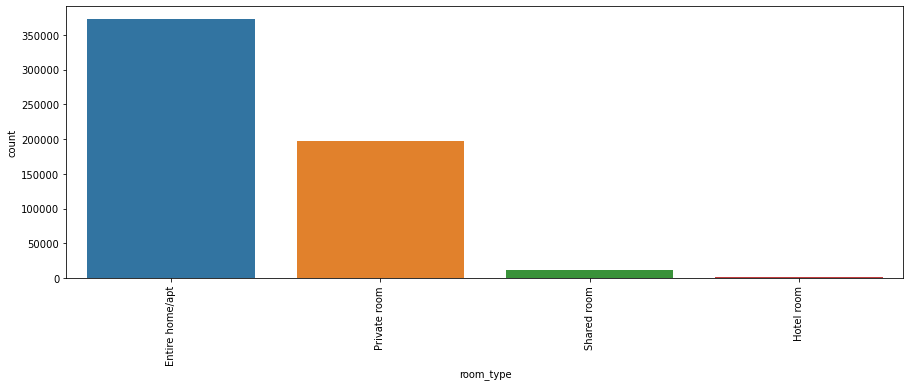

In [45]:
print(base_airbnb['room_type'].value_counts())

plt.figure(figsize=(15, 5))
grafico = sns.countplot('room_type', data=base_airbnb)
grafico.tick_params(axis='x', rotation=90)

### bed_type
Como são poucas categorias e o tipo de cama claramente é relevante para a definição do preço, vamos deichar como está.

In [46]:
print(base_airbnb['bed_type'].value_counts())

plt.figure(figsize=(15, 5))
grafico = sns.countplot('bed_type', data=base_airbnb)
grafico.tick_params(axis='x', rotation=90)

Real Bed         570643
Pull-out Sofa      8055
Futon              1634
Airbed             1155
Couch               496
Name: bed_type, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


In [47]:
# agrupando as categorias
tabela_bed_type = base_airbnb['bed_type'].value_counts()
colunas_agrupar = []

for tipo in tabela_bed_type.index:
    if tabela_bed_type[tipo] < 10000:
        colunas_agrupar.append(tipo)

print(colunas_agrupar)

['Pull-out Sofa', 'Futon', 'Airbed', 'Couch']


Real Bed    570643
Outros       11340
Name: bed_type, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


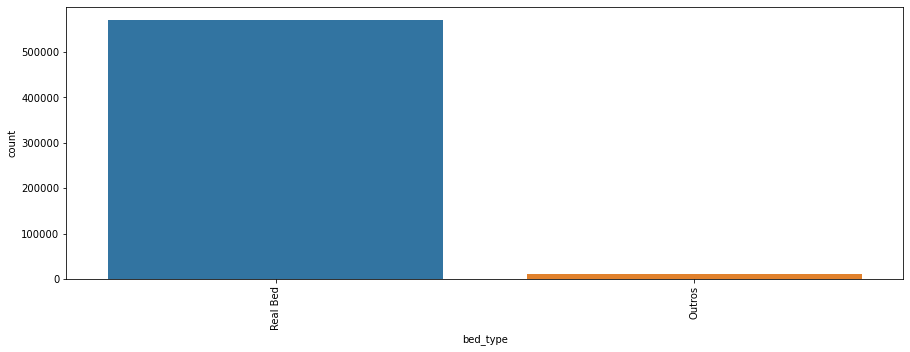

In [48]:
for tipo in colunas_agrupar:
    base_airbnb.loc[base_airbnb['bed_type']==tipo, 'bed_type'] = 'Outros'

print(base_airbnb['bed_type'].value_counts())

plt.figure(figsize=(15, 5))
grafico = sns.countplot('bed_type', data=base_airbnb)
grafico.tick_params(axis='x', rotation=90)

### cancellation_policy
Neste caso vamos agrupar as 3 categorias 'strict'.

flexible                       258096
strict_14_with_grace_period    200743
moderate                       113281
strict                           9696
super_strict_60                   135
super_strict_30                    32
Name: cancellation_policy, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


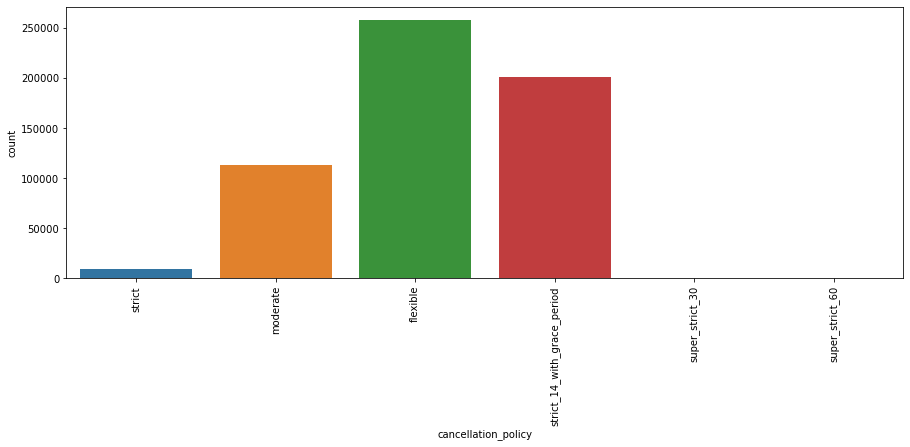

In [49]:
print(base_airbnb['cancellation_policy'].value_counts())

plt.figure(figsize=(15, 5))
grafico = sns.countplot('cancellation_policy', data=base_airbnb)
grafico.tick_params(axis='x', rotation=90)

In [50]:
# agrupando as categorias
tabela_cancellation = base_airbnb['cancellation_policy'].value_counts()
colunas_agrupar = []

for tipo in tabela_cancellation.index:
    if tabela_cancellation[tipo] < 10000:
        colunas_agrupar.append(tipo)

print(colunas_agrupar)

['strict', 'super_strict_60', 'super_strict_30']


flexible                       258096
strict_14_with_grace_period    200743
moderate                       113281
strict                           9863
Name: cancellation_policy, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


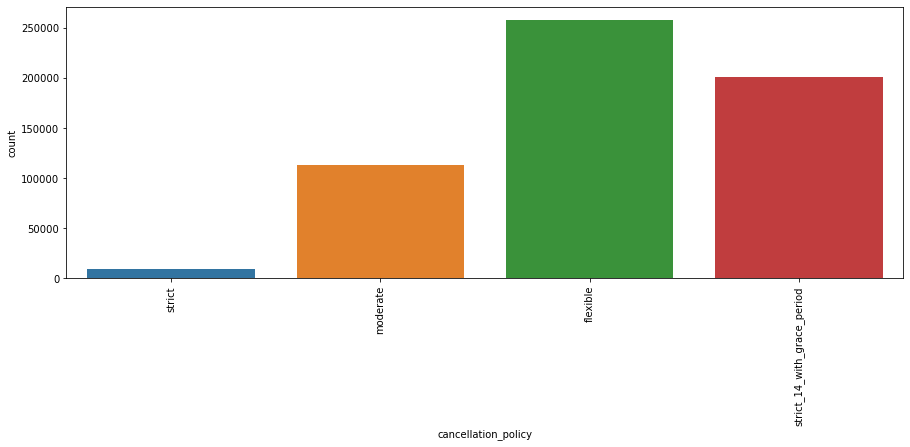

In [51]:
for tipo in colunas_agrupar:
    base_airbnb.loc[base_airbnb['cancellation_policy']==tipo, 'cancellation_policy'] = 'strict'

print(base_airbnb['cancellation_policy'].value_counts())

plt.figure(figsize=(15, 5))
grafico = sns.countplot('cancellation_policy', data=base_airbnb)
grafico.tick_params(axis='x', rotation=90)

### amenities
Amenities significa as comodidades de cada imóvel, como, tv, ar condicionado, etc.

Como não podemos comparar as comodidade em cada imóvel, pois cada um temvalores diferentes. Vamos considerar que quanto mais comodidades um hosting oferece, melhor o serviço prestado e consequentimente maior o preço da diária.

Vamos criar uma nova coluna com a contagem das comodidades e excluir a coluna amenities. E como esta coluna agora será uma coluna numérica vamos fazer nela o tratamento de outliers.

In [52]:
print(base_airbnb['amenities'].value_counts())

{}                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   6012
{TV,"Cable TV",Internet,Wifi,"Air conditioning",Kitchen,Doorman,Elevator,"Buzzer/wireless intercom",Washer}                                                                                                                                   

In [53]:
base_airbnb['n_amenities'] = base_airbnb['amenities'].str.split(',').apply(len)

In [54]:
print(base_airbnb['n_amenities'].value_counts())

12    33569
13    33012
11    32982
14    32473
15    31153
      ...  
75        6
77        5
72        5
79        2
71        2
Name: n_amenities, Length: 78, dtype: int64


In [55]:
# agora vamos excluir a coluna de amenities
base_airbnb = base_airbnb.drop('amenities', axis=1)

In [56]:
base_airbnb.shape

(581983, 20)

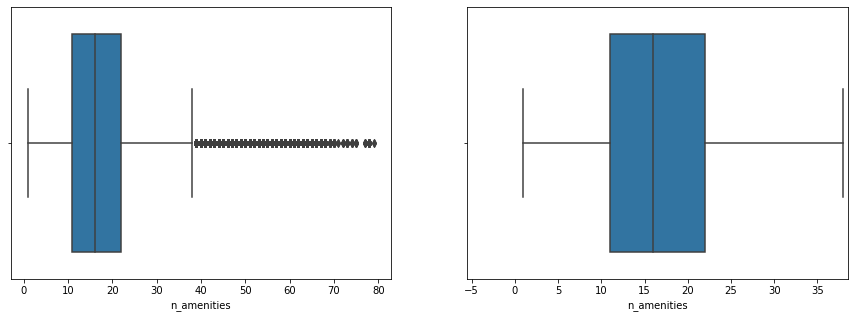

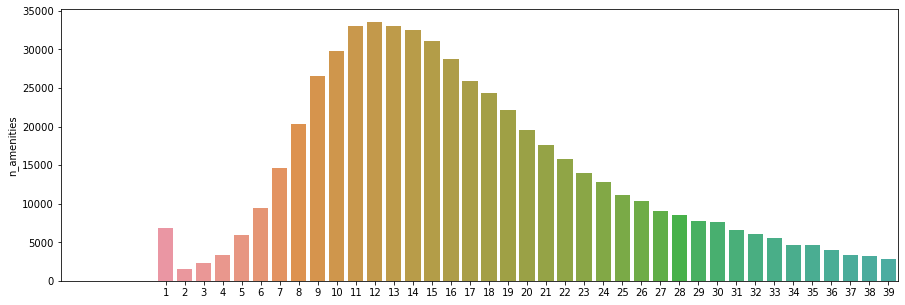

In [57]:
diagrama_caixa(base_airbnb['n_amenities'])
grafico_barra(base_airbnb['n_amenities'])

In [58]:
base_airbnb, linhas_removidas = excluir_ouliers(base_airbnb, 'n_amenities')
print(f'{linhas_removidas} linhas removidas da coluna price.')

24343 linhas removidas da coluna price.


### Visualização  de Mapa  das Propriedades
Deve-se tomar cuidado com a densidade na exibição do gráfico, diminuindo valor em '.sample(n=xxxxx)' se necessário.

Este metodo, divide a base de dados e pega aleatoriamente o número passado de dados para compor o gráfico. 

Definir o centro do mapa. 

In [59]:
amostra = base_airbnb.sample(n=50000)
centro_mapa = {'lat':amostra.latitude.mean(), 'lon':amostra.longitude.mean()}

# paremetro: base=amostra, lat=coluna latitude, lon=coluna longitude, z=coluna lateral(densidade, mudança de cor), 
    # radius=tamanho das bolinhas, center=posição do centro do mapa, zoom=zoom do mapa, map_style=estilo do gráfico
mapa = px.density_mapbox(amostra, lat='latitude', lon='longitude',z='price', radius=2.5,
                        center=centro_mapa, zoom=15,
                        mapbox_style='stamen-terrain')
mapa.show()

### Encoding
Ajustar a features para facilitar o trabalho do modelo futuro(features de categoria True e False, etc)

Os modelos somente trabalham com valores numericos. Para os valores str, não podemos utilizar relações de ordinalidade(1, 2, 3,...)

- Features True e False = 1 e 2 respectivamente.

- Features de Categoria, vamos substituir por variáveis Dummies, como abaixo:

Podemos utilizar Dummies (OneHotEncoding). Exemplo:

In [60]:
#       |  blue | green |  red  |  white
# blue  |   1   |   0   |   0   |   0
# green |   0   |   1   |   0   |   0
# red   |   0   |   0   |   1   |   0
# white |   0   |   0   |   0   |   1

In [61]:
# Features True=1 e False=0
colunas_tf = ['host_is_superhost', 'instant_bookable', 'is_business_travel_ready']

#criamos uma copia da base de dados para altera-la
base_airbnb_code = base_airbnb.copy()

for coluna in colunas_tf:
    base_airbnb_code.loc[base_airbnb_code[coluna]=='t', coluna] = 1
    base_airbnb_code.loc[base_airbnb_code[coluna]=='f', coluna] = 0

In [62]:
# Features Categoria
colunas_categoria = ['property_type', 'room_type', 'bed_type', 'cancellation_policy']
base_airbnb_code = pd.get_dummies(data=base_airbnb_code, columns=colunas_categoria)

display(base_airbnb_code.head())

host_is_superhost  host_listings_count   latitude  longitude  accommodates  \
1                 1                  2.0 -22.965919 -43.178962             5   
3                 0                  3.0 -22.977117 -43.190454             3   
4                 1                  1.0 -22.983024 -43.214270             3   
5                 1                  1.0 -22.988165 -43.193588             3   
6                 1                  1.0 -22.981269 -43.190457             2   

   bathrooms  bedrooms  beds  price  extra_people  ...  \
1        1.0       2.0   2.0  270.0          51.0  ...   
3        1.0       1.0   2.0  161.0          45.0  ...   
4        1.0       1.0   2.0  222.0          68.0  ...   
5        1.5       1.0   2.0  308.0          86.0  ...   
6        1.0       1.0   2.0  219.0          80.0  ...   

   room_type_Entire home/apt room_type_Hotel room room_type_Private room  \
1                          1                    0                      0   
3                          1                    0                      0   
4                          1                    0                      0   
5                          1                    0                      0   
6                          1                    0                      0   

   room_type_Shared room  bed_type_Outros  bed_type_Real Bed  \
1                      0                0                  1   
3                      0                0                  1   
4                      0                0                  1   
5                      0                0                  1   
6                      0                0                  1   

   cancellation_policy_flexible  cancellation_policy_moderate  \
1                             0                             0   
3                             0                             0   
4                             0                             0   
5                             0                             0   
6                             0                             0   

   cancellation_policy_strict  cancellation_policy_strict_14_with_grace_period  
1                           1                                                0  
3                           1                                                0  
4                           1                                                0  
5                           1                                                0  
6                           1                                                0  

[5 rows x 36 columns]

### Modelo de Previsão

Passos para Criar/Treinar um Modelo

	- Passo 1: Definir se é Classificação ou Regressão = Regressão

        - Passo 2: Escolher as Métricas para Avaliar o Modelo = R2(principal) e RSME(critério desempate entre modelos),mensurar tempo de processamento dos modelos, quanto mais rápido melhor.

	- Passo 3: Escolher quais Modelos vamos usar/testar = Regression Linear, Random Forest, Extra Trees

	- Passo 4: Treinar os Modelos e Testar = 80% treino e 20% teste

	- Passo 5: Comparar os Resultados dos Modelos e Escolher o Vencedor

	- Passo 6: Analisar o Melhor Modelo mais a Fundo

	- Passo 7: Fazer ajustes no Melhor Modelo 


In [74]:
# Métricas de avaliação
def avaliar_modelo(nome_modelo, y_teste, previsao):
    r2 = r2_score(y_teste, previsao)
    RSME = np.sqrt(mean_squared_error(y_teste, previsao))
    return f"""
Modelo {nome_modelo}
   R²: {r2:.2%}
 RSME: {RSME:.2f}

"""

#### Escolha dos modelos a serem testados e separando os dados
- Random Forest
- Linear Regression
- Extra Tree

In [75]:
modelo_rf = RandomForestRegressor()
modelo_lr = LinearRegression()
modelo_et = ExtraTreesRegressor()

modelos = {'RandomForest': modelo_rf,
          'LinearRegression': modelo_lr,
          'ExtraTress': modelo_et,
          }

# separando a coluna de 'price' para y e o resto da base de dados sem a coluna price em x
y = base_airbnb_code['price']
X = base_airbnb_code.drop('price', axis=1)

#### Separar os dados em treino e teste do modelo

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

for nome_modelo, modelo in modelos.items():
    #treinar modelo
    modelo.fit(X_train, y_train)
    
    #testar modelo
    previsao = modelo.predict(X_test)
    print(avaliar_modelo(nome_modelo, y_test, previsao))


Modelo RandomForest
   R²: 97.24%
 RSME: 44.05



Modelo LinearRegression
   R²: 32.70%
 RSME: 217.54



Modelo ExtraTress
   R²: 97.51%
 RSME: 41.84




### Análise do Melhor Modelo
Modelo exclolhido foi o ExtraTressRegressor:
- maior acertividade 97,51%
- menor valor de RSME, margem de erro
- velocidade de processamento semelhante à de RandomForest

### Ajustes e Melhorias no Melhor Modelo
Avaliar quais as features mais relevantes para a analise do modelo a fim de remover as features menos relevantes, tornando o modelo mais rápido sem perder performance.

O .feature_importances_ retorna o percentual de impacto de cada feature na previsão do modelo.

In [78]:
print(modelo_et.feature_importances_)
print(X_train.columns)

[0.0133532  0.03976069 0.10427191 0.10152735 0.07063459 0.06906721
 0.11871897 0.05274256 0.08544766 0.06501287 0.02203755 0.
 0.01129333 0.00471306 0.0892666  0.012657   0.00129447 0.0050313
 0.00065715 0.00094545 0.00063398 0.00702023 0.00214447 0.00228375
 0.00223204 0.06484893 0.00030396 0.0045247  0.00182347 0.00273249
 0.00263138 0.01955848 0.01210223 0.00084836 0.00787859]
Index(['host_is_superhost', 'host_listings_count', 'latitude', 'longitude',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'extra_people',
       'minimum_nights', 'instant_bookable', 'is_business_travel_ready', 'ano',
       'mes', 'n_amenities', 'property_type_Apartment',
       'property_type_Bed and breakfast', 'property_type_Condominium',
       'property_type_Guest suite', 'property_type_Guesthouse',
       'property_type_Hostel', 'property_type_House', 'property_type_Loft',
       'property_type_Outros', 'property_type_Serviced apartment',
       'room_type_Entire home/apt', 'room_type_Hotel ro

#### Colocando os valores e resoltados em um DataFrame

0
bedrooms                                         0.118719
latitude                                         0.104272
longitude                                        0.101527
n_amenities                                      0.089267
extra_people                                     0.085448
accommodates                                     0.070635
bathrooms                                        0.069067
minimum_nights                                   0.065013
room_type_Entire home/apt                        0.064849
beds                                             0.052743
host_listings_count                              0.039761
instant_bookable                                 0.022038
cancellation_policy_flexible                     0.019558
host_is_superhost                                0.013353
property_type_Apartment                          0.012657
cancellation_policy_moderate                     0.012102
ano                                              0.011293
cancellation_policy_strict_14_with_grace_period  0.007879
property_type_House                              0.007020
property_type_Condominium                        0.005031
mes                                              0.004713
room_type_Private room                           0.004525
bed_type_Outros                                  0.002732
bed_type_Real Bed                                0.002631
property_type_Outros                             0.002284
property_type_Serviced apartment                 0.002232
property_type_Loft                               0.002144
room_type_Shared room                            0.001823
property_type_Bed and breakfast                  0.001294
property_type_Guesthouse                         0.000945
cancellation_policy_strict                       0.000848
property_type_Guest suite                        0.000657
property_type_Hostel                             0.000634
room_type_Hotel room                             0.000304
is_business_travel_ready                         0.000000

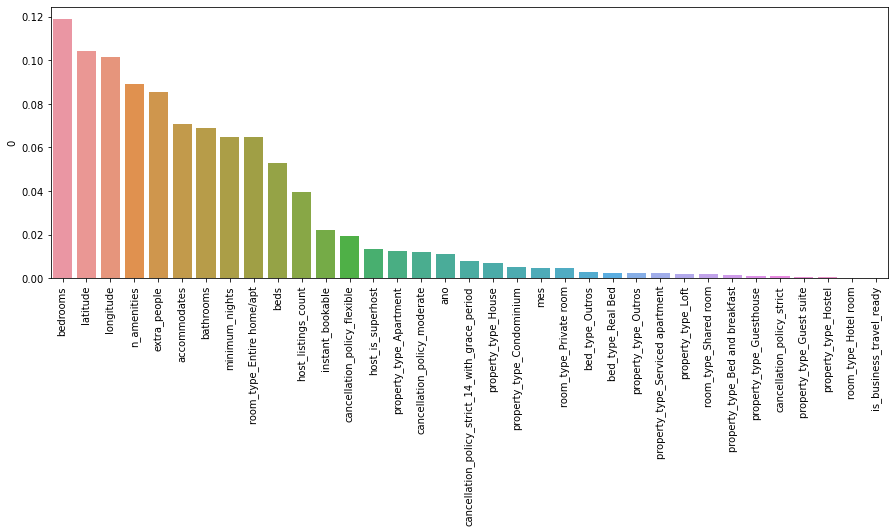

In [81]:
importancia_features = pd.DataFrame(modelo_et.feature_importances_, X_train.columns)

importancia_features = importancia_features.sort_values(by=0, ascending=False)
display(importancia_features)

# plotando gráfico
plt.figure(figsize=(15, 5))
ax = sns.barplot(x=importancia_features.index , y=importancia_features[0])
ax.tick_params(axis='x', rotation=90)

### Conclusão:

Através da tabela de importância das feature gerada pelo modelo, ou seja, o percentual de impacto de cada feature na previsão do modelo, podemos fazer as seguintes suposições:

- A localização tem o maior impacto sobre o preço, visto que latitude e longitude, somam pouco mais de 20% na relevância da formação do preço.
- O número de quartos vem em segundo lugar com pouco mais de 10% de relevância. Provavelmente indique que quanto mais quartos, maior o imóvel, maior o número de hóspedes, consequentemente, maior o preço.
- O  número de comodidades oferecidas pelo host ocupa o terceiro lugar na importância para a formação do preço. Pode ser que o número de comodidades eleve o valor do imóvel ou que a descrição detalhada tenha maior impacto ao despertar o interesse dos hóspedes, promovendo uma menor taxa de vacância.
- O número extra de hóspedes impacta no preço, provavelmente porque estes imóveis são maiores e talvez haja uma redundância com o número de quartos. 
- As acomodações, número mínimo de noites, número de banheiros e tipo, casa ou apartamento tem impacto semelhante, pouco menos de 8% cada.
- O número de camas aparece com pouco mais de 5% de relevância.
- As demais colunas oferecem menor relevância e eventualmente poderão ser removidas e o modelo testado novamente.

<br>
Resultado do modelo anterior:

Modelo ExtraTress<br>
   R²: 97.51%<br>
 RSME: 41.84


In [82]:
# removendo coluna is_business_travel_ready e trainando novamente o melhor modelo.
base_airbnb_code = base_airbnb_code.drop('is_business_travel_ready', axis=1)

y = base_airbnb_code['price']
X = base_airbnb_code.drop('price', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

modelo_et.fit(X_train, y_train)
previsao = modelo_et.predict(X_test)
print(avaliar_modelo('ExtraTress', y_test, previsao))


Modelo ExtraTress
   R²: 97.50%
 RSME: 41.94




In [83]:
# removendo coluna bed_type e trainando novamente o melhor modelo.
base_teste = base_airbnb_code.copy()
for coluna in base_teste:
    if 'bed_type' in coluna:
        base_teste = base_teste.drop(coluna, axis=1)

y = base_teste['price']
X = base_teste.drop('price', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

modelo_et.fit(X_train, y_train)
previsao = modelo_et.predict(X_test)
print(avaliar_modelo('ExtraTress', y_test, previsao))


Modelo ExtraTress
   R²: 97.50%
 RSME: 41.96




### Deploy do Projeto
- passo 1: Criar arquivo de modelo (joblib)
- passo 2: Escolher a forma de deploy:
     1. Arquivo Executável + Tkinter
     2. Deploy em um Microsite (Flask)
     3. Deploy apenas para uso direto (Streamlit)
- passo 3: Outro Arquivo Python (Jupyter ou Pycharm)
- passo 4: Importar Streamlit e criar código
- passo 5: Atribuir ao botão o carregamento do modelo
- passo 6: Deploy Feito

In [87]:
print(base_teste.columns)

Index(['host_is_superhost', 'host_listings_count', 'latitude', 'longitude',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price',
       'extra_people', 'minimum_nights', 'instant_bookable', 'ano', 'mes',
       'n_amenities', 'property_type_Apartment',
       'property_type_Bed and breakfast', 'property_type_Condominium',
       'property_type_Guest suite', 'property_type_Guesthouse',
       'property_type_Hostel', 'property_type_House', 'property_type_Loft',
       'property_type_Outros', 'property_type_Serviced apartment',
       'room_type_Entire home/apt', 'room_type_Hotel room',
       'room_type_Private room', 'room_type_Shared room',
       'cancellation_policy_flexible', 'cancellation_policy_moderate',
       'cancellation_policy_strict',
       'cancellation_policy_strict_14_with_grace_period'],
      dtype='object')


In [85]:
# salvando a base de dados de treino já pronta e tratada
X['price'] = y
X.to_csv('dados.csv')

In [86]:
# Exportando o modelo para um arquivo com os dados de treino prontos para executar futuras previsões.
import joblib
joblib.dump(modelo_et, 'modelo.joblib')

['modelo.joblib']